### Load the Libraries

In [22]:
# import matplotlib.ticker as ticker
# from collections import OrderedDict
# from colorspacious import cspace_converter
# from matplotlib import cm
import matplotlib.patches as mpatches
# from datetime import date
# from matplotlib import dates as mpl_dates
# from scipy import stats
# import scipy
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# import datetime
# import os
# from glob import glob

### Load the data

In [2]:
# data from 03 feb '22
df1 = pd.read_csv("./raw_data/03_feb_22/20220203_kumar_file1.csv")
df2 = pd.read_csv("./raw_data/03_feb_22/20220203_kumar_file2.csv")
df3 = pd.read_csv("./raw_data/03_feb_22/20220203_kumar_file3.csv")

nseqs = len(df3.index)
print(f'Total number of SARS-CoV-2 sequnces analyzed by CovidCG: {nseqs}')

Total number of SARS-CoV-2 sequnces analyzed by CovidCG: 6392612


### Data Analysis

In [3]:
# sorting the dataframe by collection date in ascending order
df1.sort_values(by='collection_date', inplace=True)

# keeping only the first entry for each mutation, hence, revealing the first occurence of each mutation
df1.drop_duplicates(subset=['mutation_str'],
                    keep='first', inplace=True, ignore_index=True)

# df1, df2 only have unique mutations by now and must have equal lengths
print(f'Do both dfs have equal length?: {len(df1.index) == len(df2.index)}')


# -----------------------------------------------------------------------------------


# Creating copies to work with; preserving the raw data
fil_df1 = df1.copy()
fil_df2 = df2.copy()

# Count column of first dataframe is useless as that corresponds to the count of
# that mutation on a particular date i.e., date of first occurrence of the mutation
del fil_df1['count']

# arranging fil_df1 and fil_df2 so that each of their entry matches in order
fil_df1.sort_values(by='mutation_name', inplace=True)
fil_df2.sort_values(by='mutation_name', inplace=True)

# To avoid any complications because of index mismatch/index clash later on
fil_df1.reset_index(drop=True, inplace=True)
fil_df2.reset_index(drop=True, inplace=True)

# Check if all rows for mutation_name are same for both dfs or not
print(
    f'Are all rows for mutation_name same in both fil_dfs?: {sum(fil_df1.mutation_name == fil_df2.mutation_name) == len(fil_df2.index)}')


# -----------------------------------------------------------------------------------


# Creating a master dataframe and removing any duplicated columns
df = pd.concat([fil_df1, fil_df2], axis=1)
df = df.loc[:, ~df.columns.duplicated()]


# -----------------------------------------------------------------------------------


# Adding the percentage abundance column
df['per_abundance'] = df['fraction'].multiply(100)

# Renaming the troubling columns
# because count is a python function as well and it may lead to trouble later on
# e.g., calling it as df.count.nsmallest(1) will give us attribute error
df.rename(columns={"count": "count_of_seqs"}, inplace=True)

# to convert collection date column to pandas datetime format
df['collection_date'] = pd.to_datetime(df['collection_date'],
                                       format='%Y-%m-%d %H:%M:%S.%f')
df3['collection_date'] = pd.to_datetime(df3['collection_date'],
                                        format='%Y-%m-%d %H:%M:%S.%f')

print(f'This should be a pandas Timestamp: {type(df.collection_date[0])}')


# -----------------------------------------------------------------------------------


# Removing any mutations containing 'N' from the dataframe
df = df[~(df.mutation_name.str.contains('N+', regex=True))]

df.reset_index(drop=True, inplace=True)


# -----------------------------------------------------------------------------------


# Creating a copy of master dataframe to work with; preserving the master dataframe
DF = df.copy()
DF.sort_values(by='count_of_seqs', inplace=True, ascending=False)

print(
    f'(Initially)Length of the master dataframe is: {len(DF.index)}; Smallest count is {DF.count_of_seqs.min()}')

Do both dfs have equal length?: True
Are all rows for mutation_name same in both fil_dfs?: True
This should be a pandas Timestamp: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
(Initially)Length of the master dataframe is: 81756; Smallest count is 1


- (https://stackoverflow.com/questions/8327705/what-are-and-in-regular-expressions)

In [4]:
# To get substitutions, deletions and insertions
substitutions = DF[~(DF.ref.str.contains('-') | DF.alt.str.contains('-'))]
print(f'#Substitutions: {len(substitutions.index)}')

deletions = DF[DF.alt.str.contains('-')]
print(f'#Deletions: {len(deletions.index)}')

insertions = DF[DF.ref.str.contains('-')]
print(f'#Insertions: {len(insertions.index)}')


#Substitutions: 67503
#Deletions: 9646
#Insertions: 4607


In [5]:
# >=0.1%
df_per_pt1 = DF[DF['per_abundance'] >= 0.1]
df_per_pt1.reset_index(drop=True, inplace=True)

df_per_pt1_subs = substitutions[substitutions['per_abundance'] >= 0.1]
df_per_pt1_dels = deletions[deletions['per_abundance'] >= 0.1]
df_per_pt1_ins = insertions[insertions['per_abundance'] >= 0.1]

print('For Mutations >= 0.1%')
print(f'Length of dataframe is: {len(df_per_pt1.index)};\nSmallest count is {df_per_pt1.count_of_seqs.min()}')
print(f'#Substitutions: {len(df_per_pt1_subs.index)}')
print(f'#Deletions: {len(df_per_pt1_dels.index)}')
print(f'#Insertions: {len(df_per_pt1_ins.index)}')
print()

df_per_pt1_subs.reset_index(drop=True, inplace=True)
df_per_pt1_dels.reset_index(drop=True, inplace=True)
df_per_pt1_ins.reset_index(drop=True, inplace=True)

df_per_pt1_subs.name = 'subs_pt1per'
df_per_pt1_dels.name = 'dels_pt1per'
df_per_pt1_ins.name = 'ins_pt1per'


# -----------------------------------------------------------------------------------


# >=0.05%
df_per_pt05 = DF[DF['per_abundance'] >= 0.05]
df_per_pt05.reset_index(drop=True, inplace=True)

df_per_pt05_subs = substitutions[substitutions['per_abundance'] >= 0.05]
df_per_pt05_dels = deletions[deletions['per_abundance'] >= 0.05]
df_per_pt05_ins = insertions[insertions['per_abundance'] >= 0.05]

print('For Mutations >= 0.05%')
print(f'Length of dataframe is: {len(df_per_pt05.index)};\nSmallest count is {df_per_pt05.count_of_seqs.min()}')
print(f'#Substitutions: {len(df_per_pt05_subs.index)}')
print(f'#Deletions: {len(df_per_pt05_dels.index)}')
print(f'#Insertions: {len(df_per_pt05_ins.index)}')
print()

df_per_pt05_subs.reset_index(drop=True, inplace=True)
df_per_pt05_dels.reset_index(drop=True, inplace=True)
df_per_pt05_ins.reset_index(drop=True, inplace=True)

df_per_pt05_subs.name = 'subs_pt05per'
df_per_pt05_dels.name = 'dels_pt05per'
df_per_pt05_ins.name = 'ins_pt05per'


# -----------------------------------------------------------------------------------


# >=0.02%
df_per_pt02 = DF[DF['per_abundance'] >= 0.02]
df_per_pt02.reset_index(drop=True, inplace=True)

df_per_pt02_subs = substitutions[substitutions['per_abundance'] >= 0.02]
df_per_pt02_dels = deletions[deletions['per_abundance'] >= 0.02]
df_per_pt02_ins = insertions[insertions['per_abundance'] >= 0.02]

print('For Mutations >= 0.02%')
print(f'Length of dataframe is: {len(df_per_pt02.index)};\nSmallest count is {df_per_pt02.count_of_seqs.min()}')
print(f'#Substitutions: {len(df_per_pt02_subs.index)}')
print(f'#Deletions: {len(df_per_pt02_dels.index)}')
print(f'#Insertions: {len(df_per_pt02_ins.index)}')
print()

df_per_pt02_subs.reset_index(drop=True, inplace=True)
df_per_pt02_dels.reset_index(drop=True, inplace=True)
df_per_pt02_ins.reset_index(drop=True, inplace=True)

df_per_pt02_subs.name = 'subs_pt02per'
df_per_pt02_dels.name = 'dels_pt02per'
df_per_pt02_ins.name = 'ins_pt02per'


# -----------------------------------------------------------------------------------


# >0.01%
df_per_pt01 = DF[DF['per_abundance'] >= 0.01]
df_per_pt01.reset_index(drop=True, inplace=True)

df_per_pt01_subs = substitutions[substitutions['per_abundance'] >= 0.01]
df_per_pt01_dels = deletions[deletions['per_abundance'] >= 0.01]
df_per_pt01_ins = insertions[insertions['per_abundance'] >= 0.01]

print(r'For Mutations >= 0.01%')
print(f'Length of dataframe is: {len(df_per_pt01.index)};\nSmallest count is {df_per_pt01.count_of_seqs.min()}')
print(f'#Substitutions: {len(df_per_pt01_subs.index)}')
print(f'#Deletions: {len(df_per_pt01_dels.index)}')
print(f'#Insertions: {len(df_per_pt01_ins.index)}')
print()

df_per_pt01_subs.reset_index(drop=True, inplace=True)
df_per_pt01_dels.reset_index(drop=True, inplace=True)
df_per_pt01_ins.reset_index(drop=True, inplace=True)

df_per_pt01_subs.name = 'subs_pt01per'
df_per_pt01_dels.name = 'dels_pt01per'
df_per_pt01_ins.name = 'ins_pt01per'

For Mutations >= 0.1%
Length of dataframe is: 1821;
Smallest count is 6393
#Substitutions: 1777
#Deletions: 32
#Insertions: 12

For Mutations >= 0.05%
Length of dataframe is: 3072;
Smallest count is 3197
#Substitutions: 2993
#Deletions: 56
#Insertions: 23

For Mutations >= 0.02%
Length of dataframe is: 6024;
Smallest count is 1279
#Substitutions: 5874
#Deletions: 107
#Insertions: 43

For Mutations >= 0.01%
Length of dataframe is: 9854;
Smallest count is 640
#Substitutions: 9594
#Deletions: 187
#Insertions: 73



### Visualization

#### Prepararing dataframes for visualizations

In [19]:
SARS_COV_2_GENOME_RANGE = range(1, 29904)

# Creating new dataframes for viz (visualizations)
df_viz = pd.DataFrame({'genome_positions': SARS_COV_2_GENOME_RANGE})
df_viz_per_pt1 = pd.DataFrame({'genome_positions': SARS_COV_2_GENOME_RANGE})
df_viz_per_pt05 = pd.DataFrame({'genome_positions': SARS_COV_2_GENOME_RANGE})
df_viz_per_pt01 = pd.DataFrame({'genome_positions': SARS_COV_2_GENOME_RANGE})
df_viz_per_pt02 = pd.DataFrame({'genome_positions': SARS_COV_2_GENOME_RANGE})

# Since dataframes are unhashable so, can't map these two types of 
# dataframes directly as none of them are suitable as keys, hence, using
# a commono set of keys to create two mappings to aid in looping
df_mapping = {'master': DF, 
              'pt1': df_per_pt1, 
              'pt05': df_per_pt05, 
              'pt01': df_per_pt01,
              'pt02': df_per_pt02}

viz_df_mapping = {'master': df_viz, 
                  'pt1': df_viz_per_pt1, 
                  'pt05': df_viz_per_pt05, 
                  'pt01': df_viz_per_pt01, 
                  'pt02': df_viz_per_pt02}

keys_list = ['master', 'pt1', 'pt05', 'pt01', 'pt02']



for key in keys_list:
    
    viz_df_mapping[key]['per_mutated'] = 0
    for i in range(len(viz_df_mapping[key].index)):
        viz_df_mapping[key].per_mutated.iloc[i] = sum(df_mapping[key].per_abundance[df_mapping[key].pos == viz_df_mapping[key].genome_positions.iloc[i]])
    viz_df_mapping[key]['per_conservation'] = 100 - viz_df_mapping[key]['per_mutated']

In [24]:
# For S- gene
start_pos = 21563
end_pos = 25384
df_gene_S = df_viz_per_pt1.iloc[start_pos - 1:end_pos]

# For N- gene
start_pos = 28274
end_pos = 29533
df_gene_N = df_viz_per_pt1.iloc[start_pos - 1:end_pos]

#### Plots

##### Using >=0.1 dataframe

(0.0, 100.0)

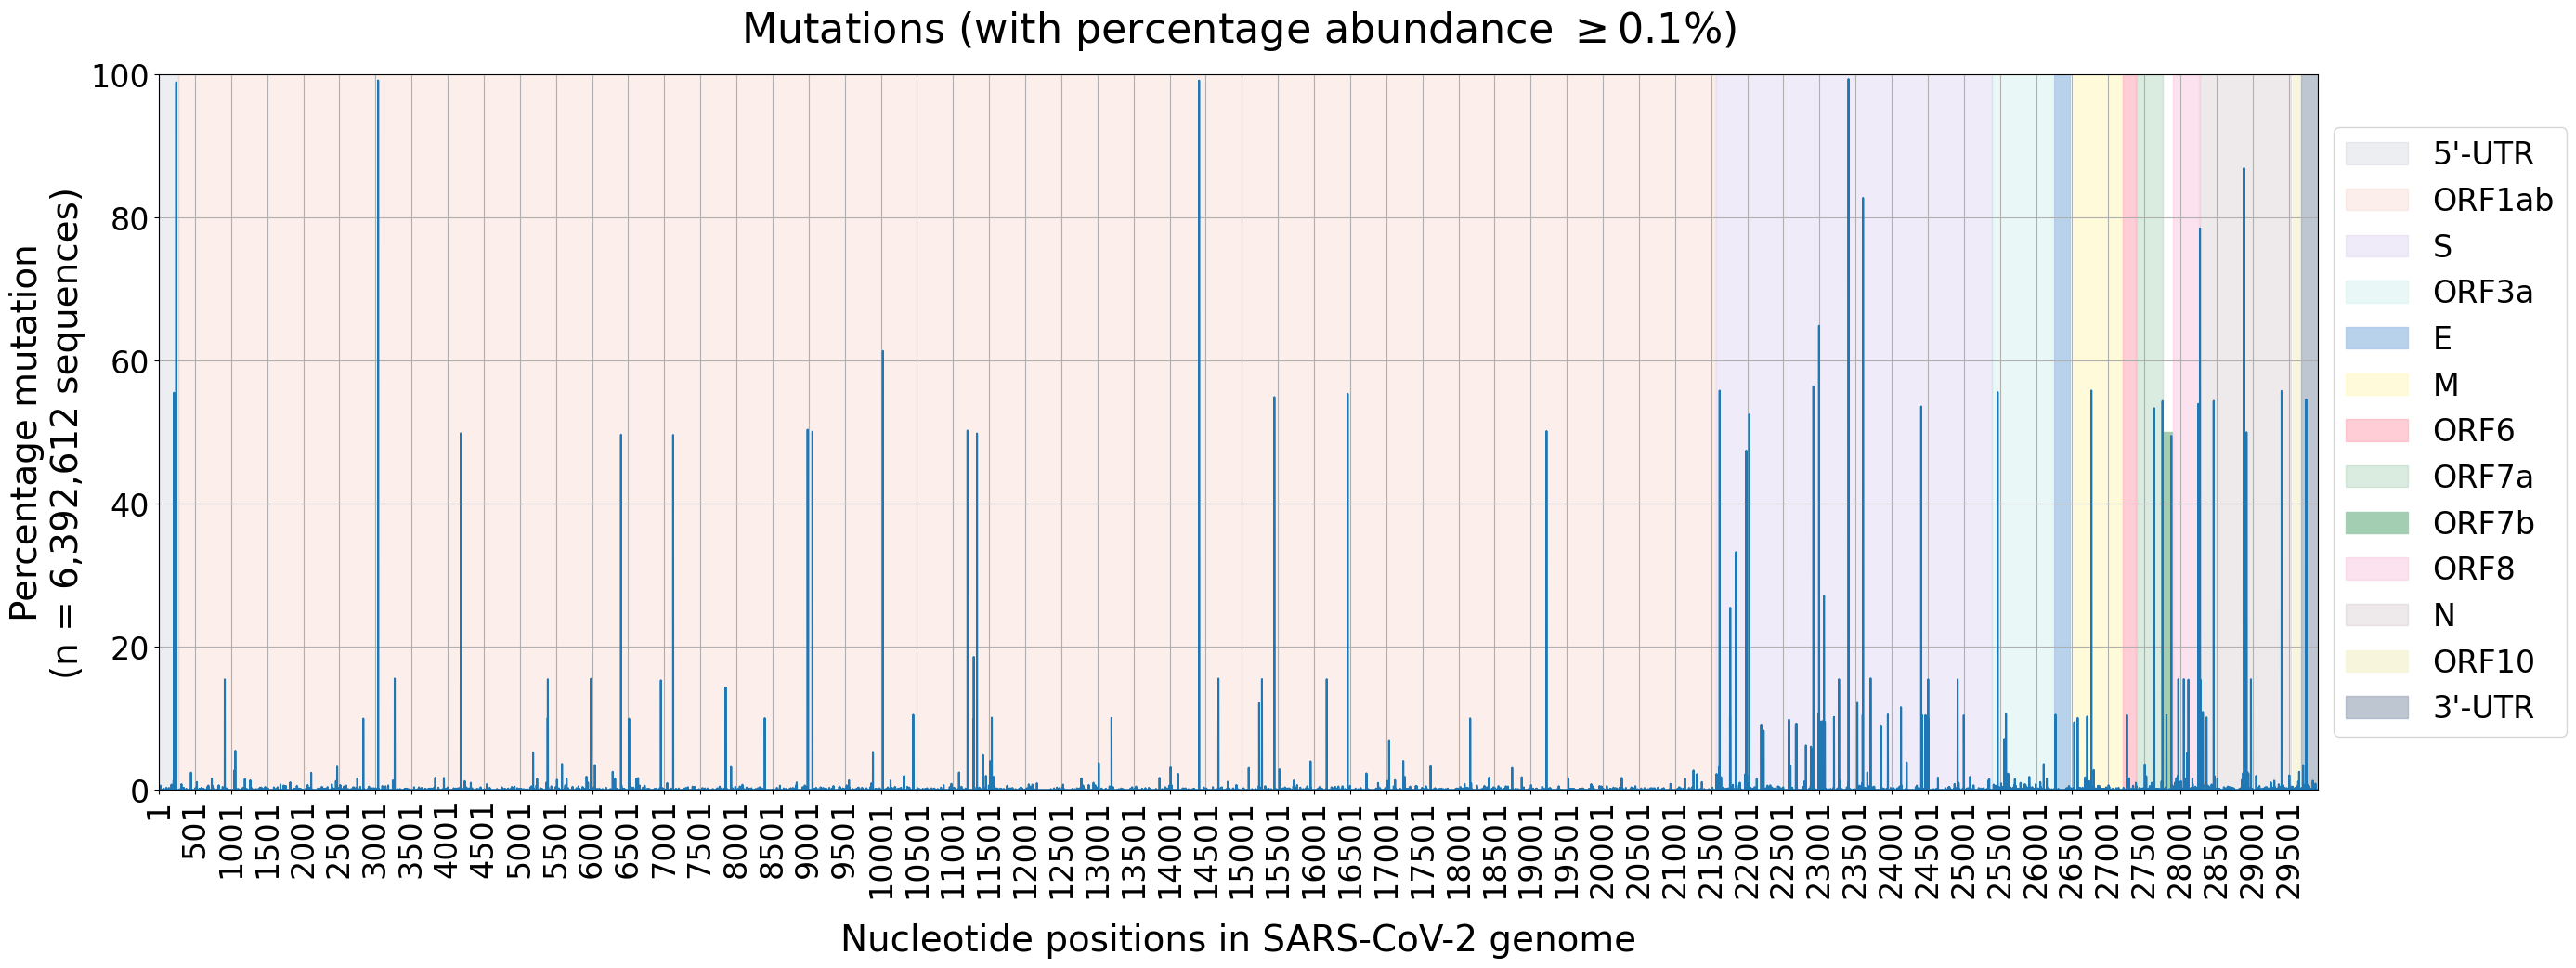

In [29]:
plt.style.use('default')

plt.figure(figsize=(30,10), facecolor = (1, 1, 1))
plt.grid(True)

plt.title('Mutations (with percentage abundance $\geq$0.1%)', 
          fontsize = 32, pad=25)
plt.ylabel(f'Percentage mutation\n(n = {nseqs:,} sequences)', 
           fontsize = 28)
plt.xlabel('Nucleotide positions in SARS-CoV-2 genome', 
           fontsize = 28, labelpad=20)

plt.plot(df_viz_per_pt1.genome_positions, df_viz_per_pt1.per_mutated)

plt.xticks(np.arange(min(df_viz_per_pt1.genome_positions), max(df_viz_per_pt1.genome_positions)+1, 500), 
           rotation=90, fontsize=24)
plt.yticks(fontsize=24)

# ----------------------------------------------------------------------------------------------------
# Adding patches to annotate the plot (using numbers from NCBI)
max_val = 100


rect_5UTR = mpatches.Rectangle((1,0), 264, max_val, fill=True, color="#A3AEC0", 
                               alpha=0.2, linewidth=1, label="5'-UTR")
plt.gca().add_patch(rect_5UTR)
rect_ORF1ab = mpatches.Rectangle((266,0), 21289, max_val, fill=True, color="#F6C9BC", 
                                 alpha=0.3, linewidth=1, label="ORF1ab")
plt.gca().add_patch(rect_ORF1ab)
rect_S = mpatches.Rectangle((21563,0), 3821, max_val, fill=True, color="#CCBFE9", 
                            alpha=0.3, linewidth=1, label="S")
plt.gca().add_patch(rect_S)
rect_ORF3a = mpatches.Rectangle((25393,0), 827, max_val, fill=True, color="#B8E9E4", 
                                alpha=0.3, linewidth=1, label="ORF3a")
plt.gca().add_patch(rect_ORF3a)
rect_E = mpatches.Rectangle((26245,0), 227, max_val, fill=True, color="#A7C7E7", 
                            alpha=0.8, linewidth=1, label="E")
plt.gca().add_patch(rect_E)
rect_M = mpatches.Rectangle((26523,0), 668, max_val, fill=True, color="#FFF8C2", 
                            alpha=0.6, linewidth=1, label="M")
plt.gca().add_patch(rect_M)
rect_ORF6 = mpatches.Rectangle((27202,0), 185, max_val, fill= True, color="#FFADBB", 
                               alpha=0.6, linewidth=1, label="ORF6")
plt.gca().add_patch(rect_ORF6)
rect_ORF7a = mpatches.Rectangle((27394,0), 365, max_val, fill=True, color="#A3CEB1", 
                                alpha=0.4, linewidth=1, label="ORF7a")
plt.gca().add_patch(rect_ORF7a)
rect_ORF7b = mpatches.Rectangle((27756,0), 131, (max_val/2), fill=True,color="#A3CEB1", 
                                alpha=1, linewidth=1, label="ORF7b")
plt.gca().add_patch(rect_ORF7b)
rect_ORF8 = mpatches.Rectangle((27894,0), 365, max_val, fill=True, color="#FBCDE4", 
                               alpha=0.6, linewidth=1, label="ORF8")
plt.gca().add_patch(rect_ORF8)
rect_N = mpatches.Rectangle((28274,0), 1259, max_val, fill=True, color="#602F44", 
                            alpha=0.1, linewidth=1, label="N")
plt.gca().add_patch(rect_N)
rect_ORF10 = mpatches.Rectangle((29558,0), 116, max_val, fill=True, color="#F7F5DC", 
                                alpha=1, linewidth=1, label="ORF10")
plt.gca().add_patch(rect_ORF10)
rect_3UTR = mpatches.Rectangle((29675,0), 228, max_val, fill=True, color="#A3AEC0", 
                               alpha=0.7, linewidth=1, label="3'-UTR")
plt.gca().add_patch(rect_3UTR)
# ----------------------------------------------------------------------------------------------------

# plt.legend(fontsize="x-large")
plt.legend(loc='center left', bbox_to_anchor=(1, .5), fontsize=24)

# Setting limits on x- and y- axis 
plt.xlim(0, 29904)
plt.ylim(0, 100)

# Saving the plot
# plt.savefig('plots_region_conservation/panel_01_A_with_legends.png', dpi=1000, bbox_inches='tight')


(0.0, 100.0)

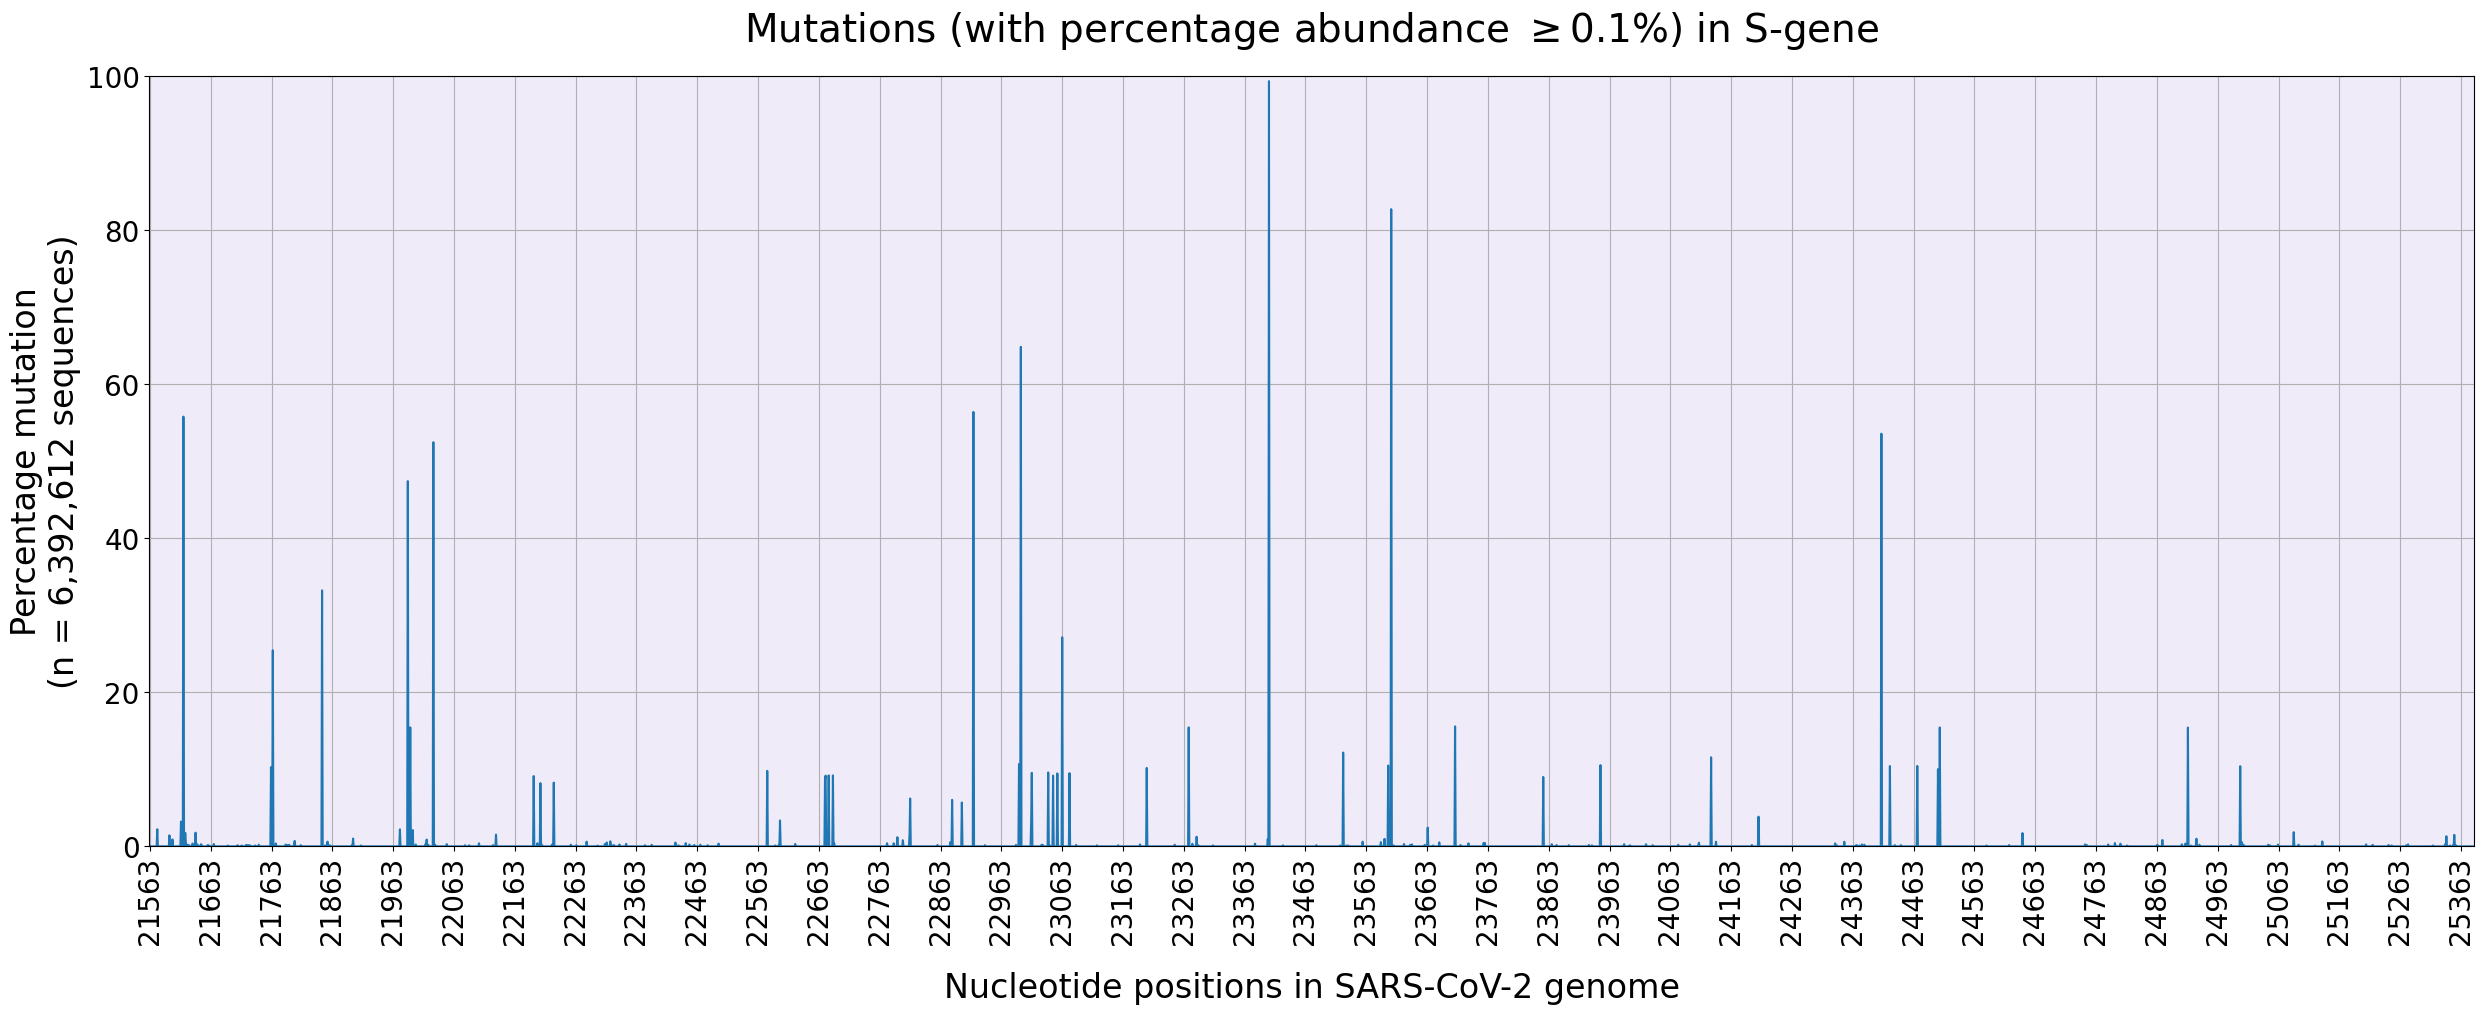

In [25]:
plt.style.use('default')

plt.figure(figsize=(30,10), facecolor = (1, 1, 1))
plt.grid(True)

plt.title('Mutations (with percentage abundance $\geq$0.1%) in S-gene', 
          fontsize = 28, pad=25)
plt.ylabel(f'Percentage mutation\n(n = {nseqs:,} sequences)', 
           fontsize = 24)
plt.xlabel('Nucleotide positions in SARS-CoV-2 genome', 
           fontsize = 24, labelpad=20)

plt.plot(df_gene_S.genome_positions, df_gene_S.per_mutated) 


max_val = 100
rect_S = mpatches.Rectangle((21563,0), 3821, max_val, fill=True, color="#CCBFE9", 
                            alpha=0.3, linewidth=1, label="S")
plt.gca().add_patch(rect_S)


plt.xticks(np.arange(min(df_gene_S.genome_positions), max(df_gene_S.genome_positions)+1, 100), 
           rotation=90, fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(21562, 25384+1)
plt.ylim(0, 100)

# plt.savefig('plots_region_conservation/panel_01_C.png', dpi=1000, bbox_inches='tight')

(0.0, 100.0)

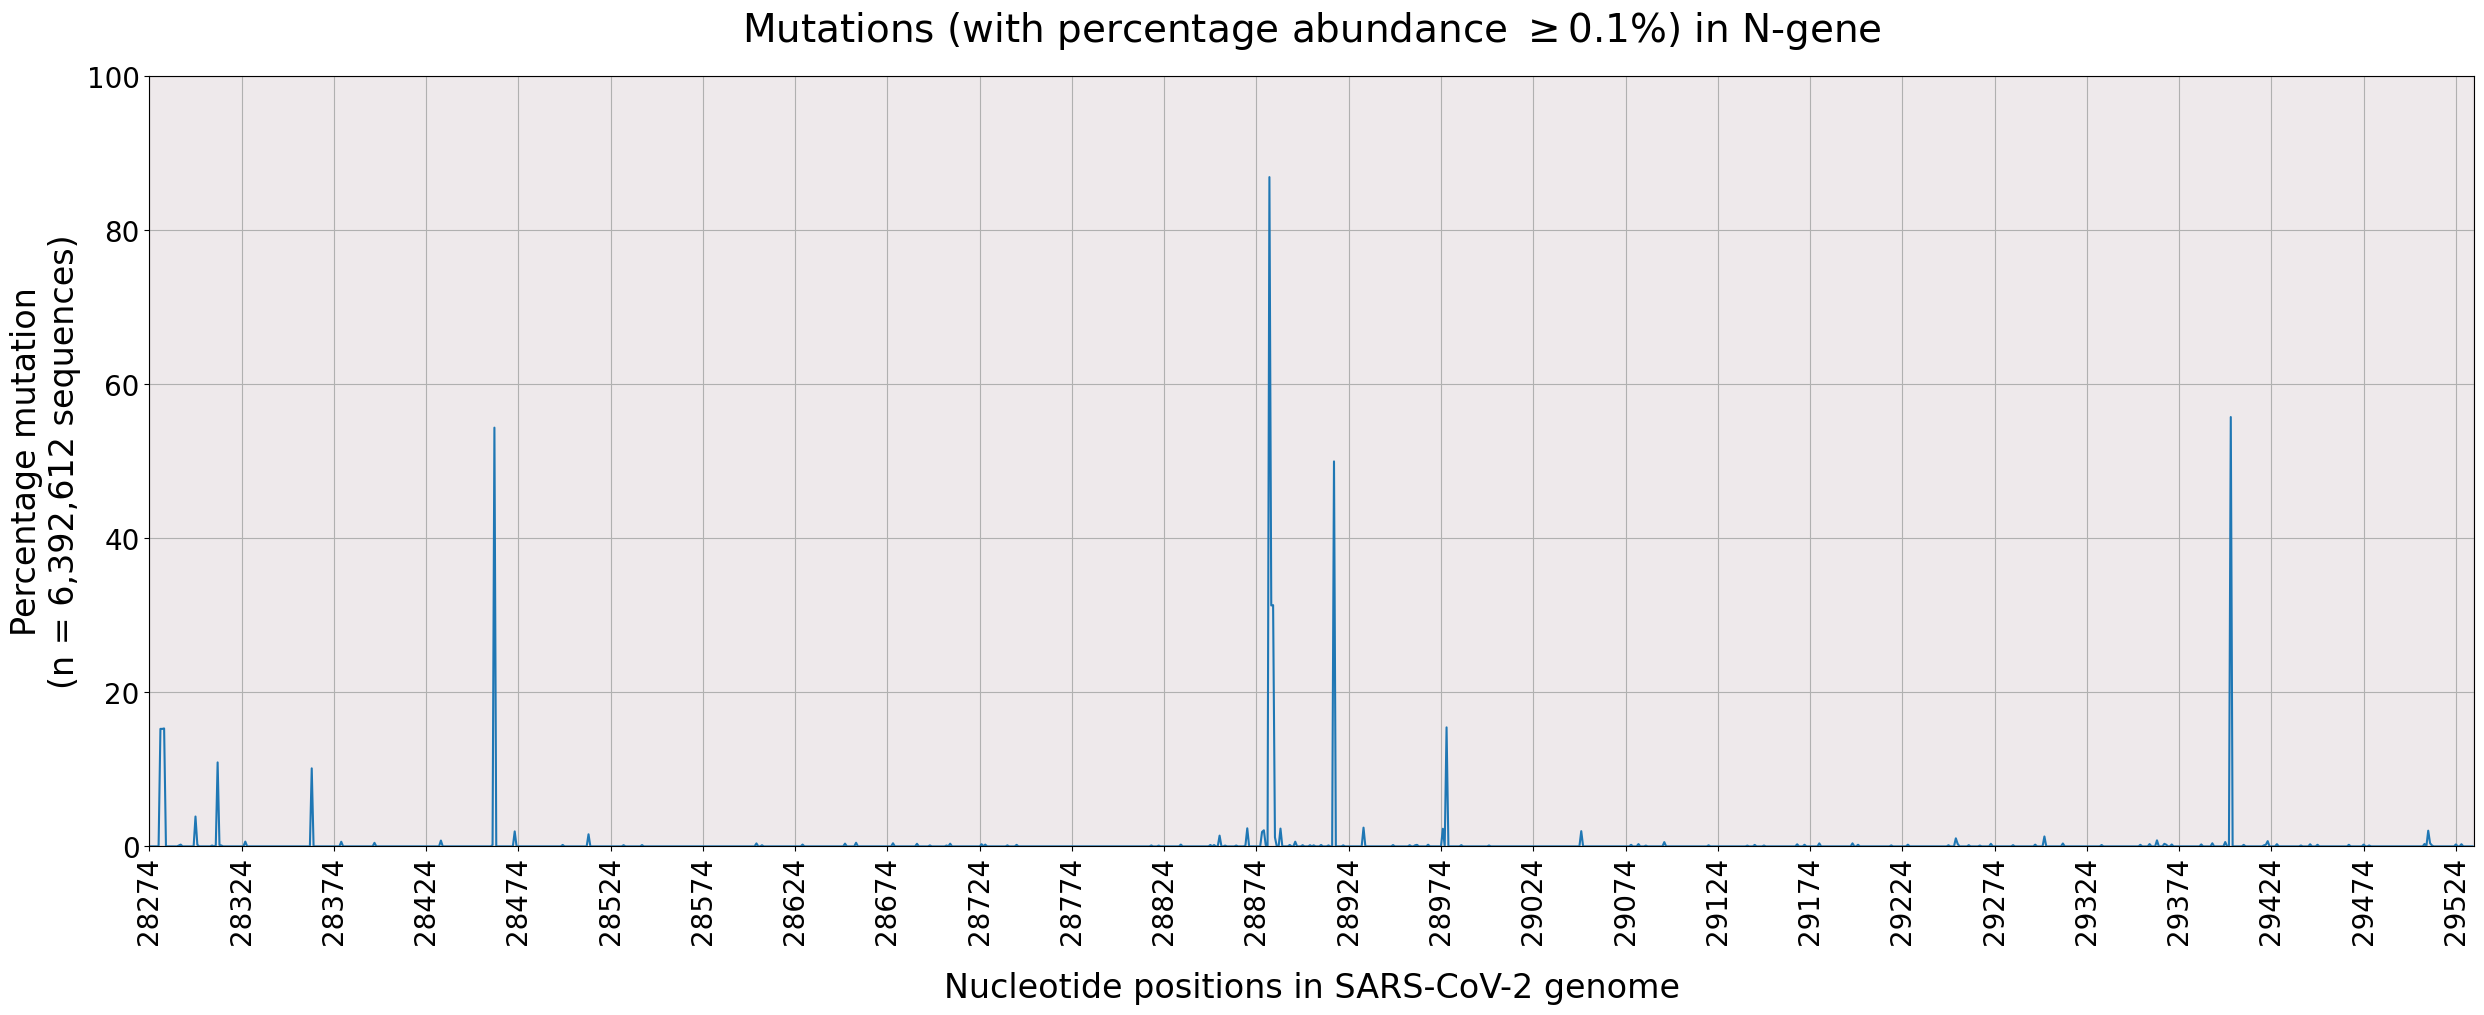

In [26]:
plt.style.use('default')

plt.figure(figsize=(30,10), facecolor = (1, 1, 1))
plt.grid(True)

plt.title('Mutations (with percentage abundance $\geq$0.1%) in N-gene', 
          fontsize = 28, pad=25)
plt.ylabel(f'Percentage mutation\n(n = {nseqs:,} sequences)', 
           fontsize = 24)
plt.xlabel('Nucleotide positions in SARS-CoV-2 genome', 
           fontsize = 24, labelpad=20)

plt.plot(df_gene_N.genome_positions, df_gene_N.per_mutated)

max_val = 100
rect_N = mpatches.Rectangle((28274,0), 1259, max_val, fill=True, color="#602F44", 
                            alpha=0.1, linewidth=1, label="N")
plt.gca().add_patch(rect_N)

plt.xticks(np.arange(min(df_gene_N.genome_positions), max(df_gene_N.genome_positions)+1, 50), 
           rotation=90, fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(28274, 29533+1)
plt.ylim(0, 100)

# plt.savefig('plots_region_conservation/panel_01_D.png', dpi=1000, bbox_inches='tight')
